# Viral Social Media Trends - Exploratory Data Analysis

## 1. Setup and Data Loading

Let's start by importing the necessary libraries and loading our dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set styling for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the dataset
df = pd.read_csv('Files/Viral_Social_Media_Trends.csv')

# Display the first few rows to get a glimpse of the data
print(f"Data shape: {df.shape}")
df

Data shape: (5000, 10)


,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


## 2. Understanding the Data Structure
Let's examine the basic structure of our dataset, checking for data types, missing values, and summary statistics.

In [2]:
# Check data types and missing values
df.info()

# Display summary statistics
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_data[missing_data['Missing Values'] > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


,Missing Values,Percentage (%)


## 3. Categorical Data Analysis

Let's explore the distribution of categorical variables like Platform, Content_Type, Region, and Engagement_Level.

In [3]:
# Create a function to plot categorical data distribution
def plot_categorical_distribution(data, column, title, palette="viridis"):
    plt.figure(figsize=(12, 6))
    count_plot = sns.countplot(x=column, data=data, palette=palette, order=data[column].value_counts().index)
    plt.title(f'Distribution of {title}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    
    # Add count labels on top of each bar
    for p in count_plot.patches:
        count_plot.annotate(
                            f'{p.get_height():,}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'bottom', 
                            fontsize=12
                            )
        
    plt.tight_layout()
    plt.show()

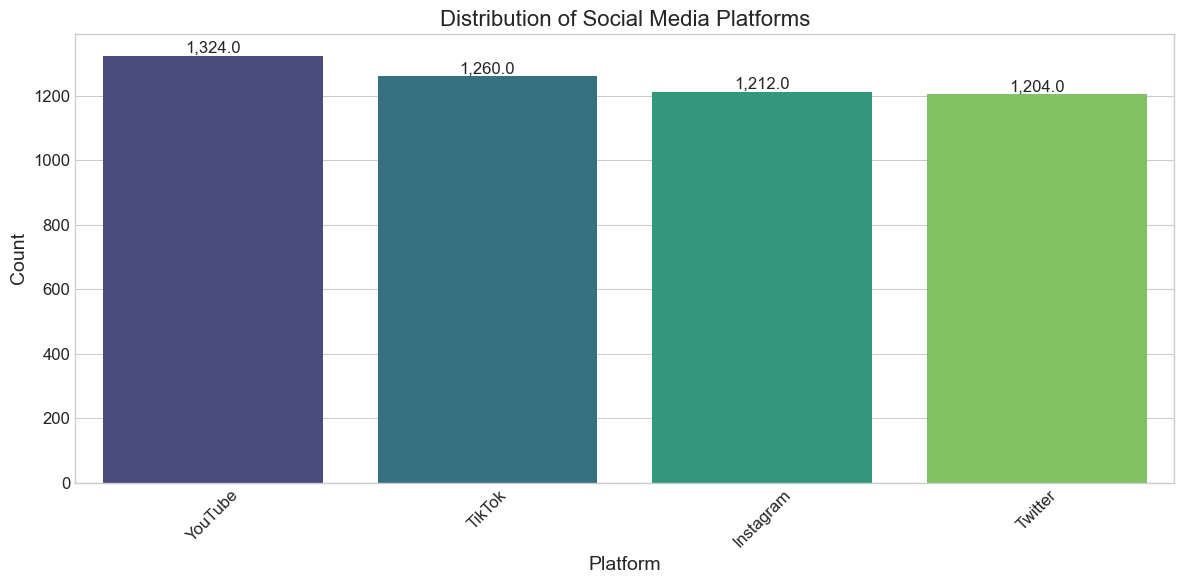

In [4]:
# Plot distribution of platforms
plot_categorical_distribution(df, 'Platform', 'Social Media Platforms')

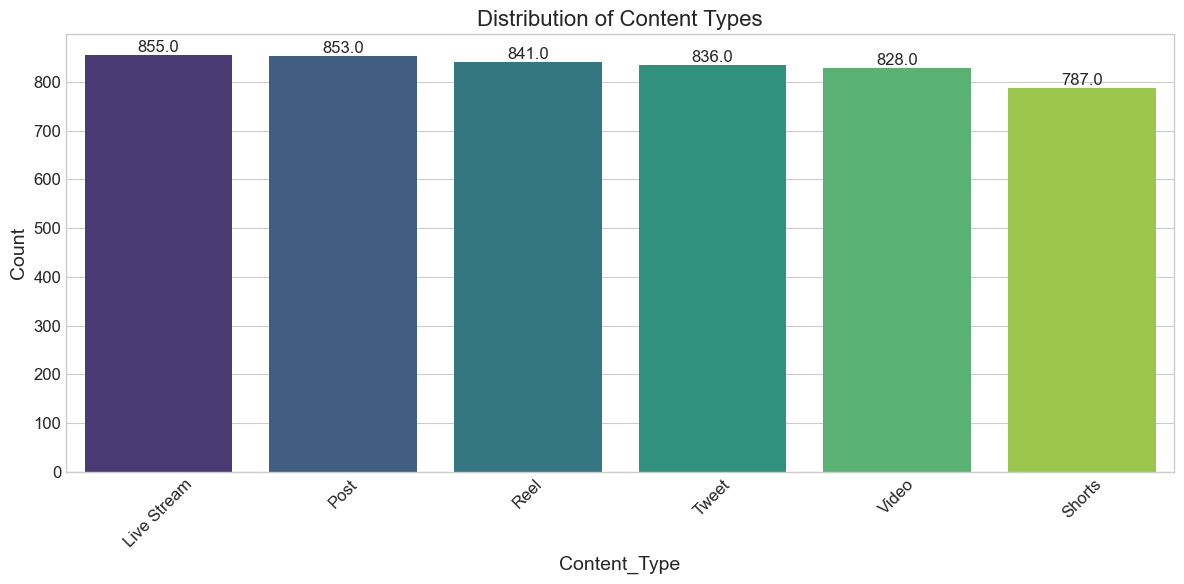

In [5]:
# Plot distribution of content types
plot_categorical_distribution(df, 'Content_Type', 'Content Types')

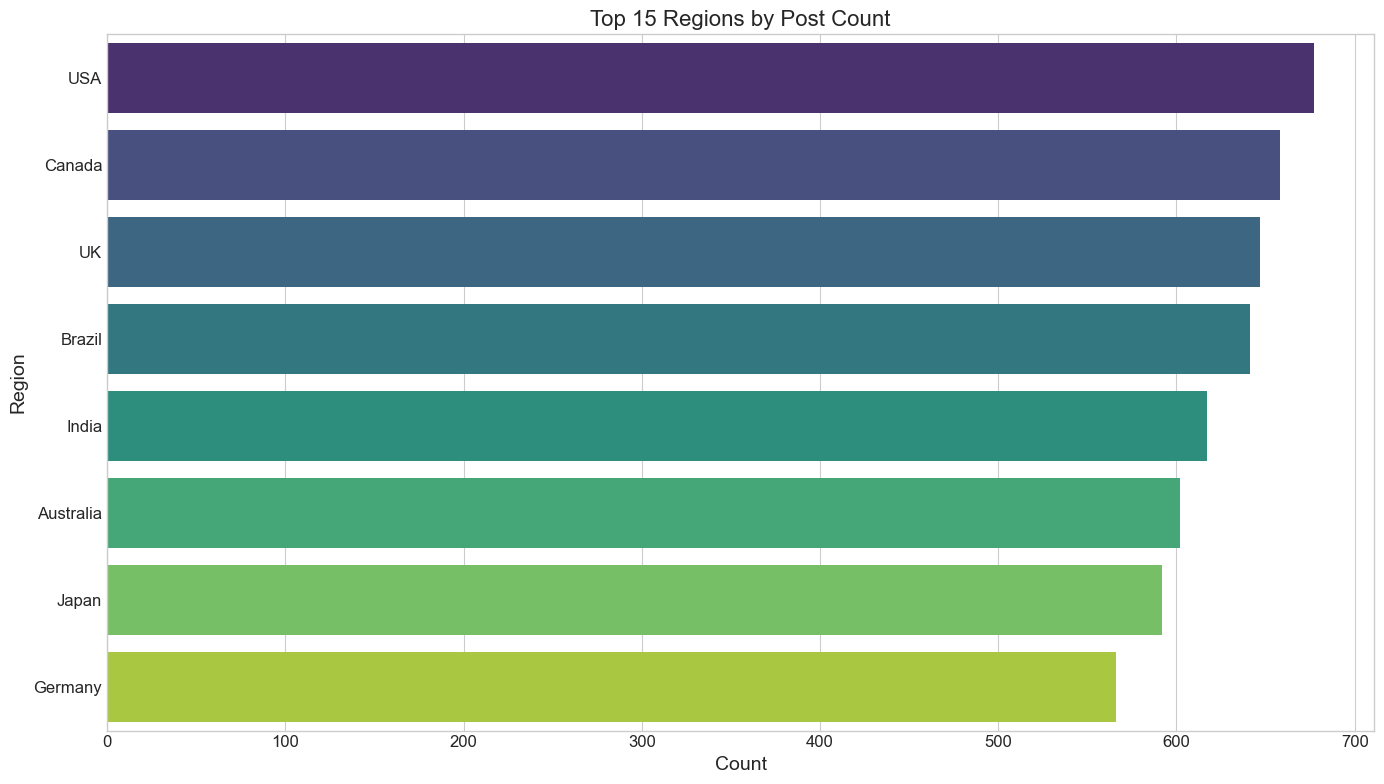

In [6]:
# Plot distribution of regions (top 15)
top_regions = df['Region'].value_counts().head(15).index
plt.figure(figsize=(14, 8))
sns.countplot(y='Region', data=df[df['Region'].isin(top_regions)], 
              order=df['Region'].value_counts().head(15).index,
              palette="viridis")
plt.title('Top 15 Regions by Post Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()
plt.show()

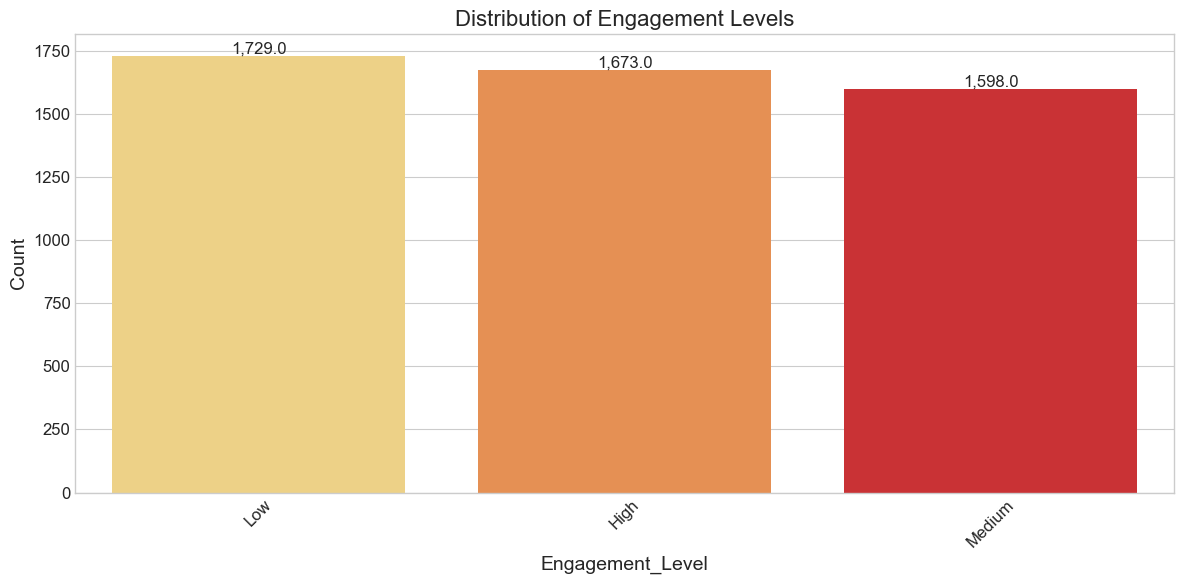

In [7]:
# Plot distribution of engagement levels
plot_categorical_distribution(df, 'Engagement_Level', 'Engagement Levels', palette="YlOrRd")

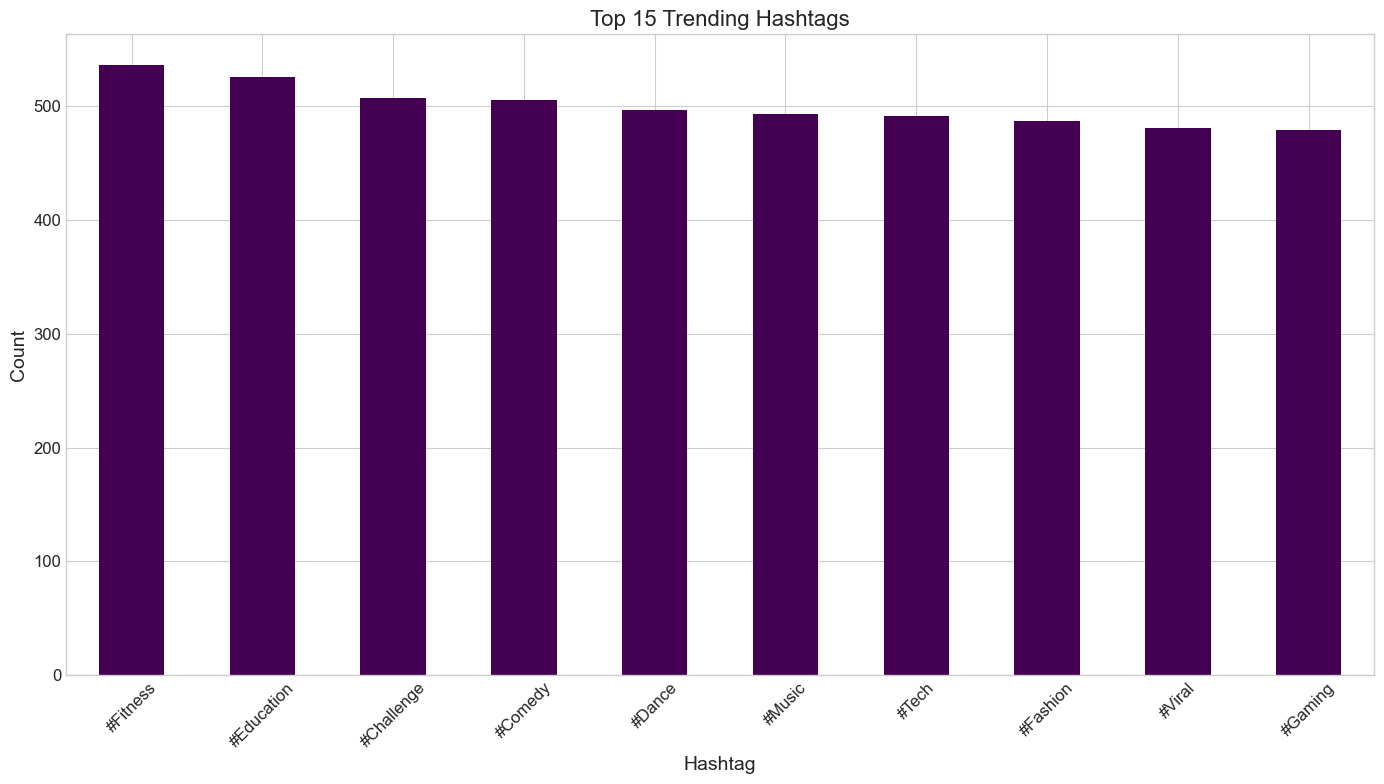

In [8]:
# Plot distribution of trending hashtags (top 15)
plt.figure(figsize=(14, 8))
df['Hashtag'].value_counts().head(15).plot(kind='bar', colormap='viridis')
plt.title('Top 15 Trending Hashtags', fontsize=16)
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Numerical Data Analysis

Now let's analyze the distribution and relationship of numerical variables like Views, Likes, Shares, and Comments.

In [9]:
# Basic statistics for numerical columns
numerical_cols = ['Views', 'Likes', 'Shares', 'Comments']
df[numerical_cols].describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

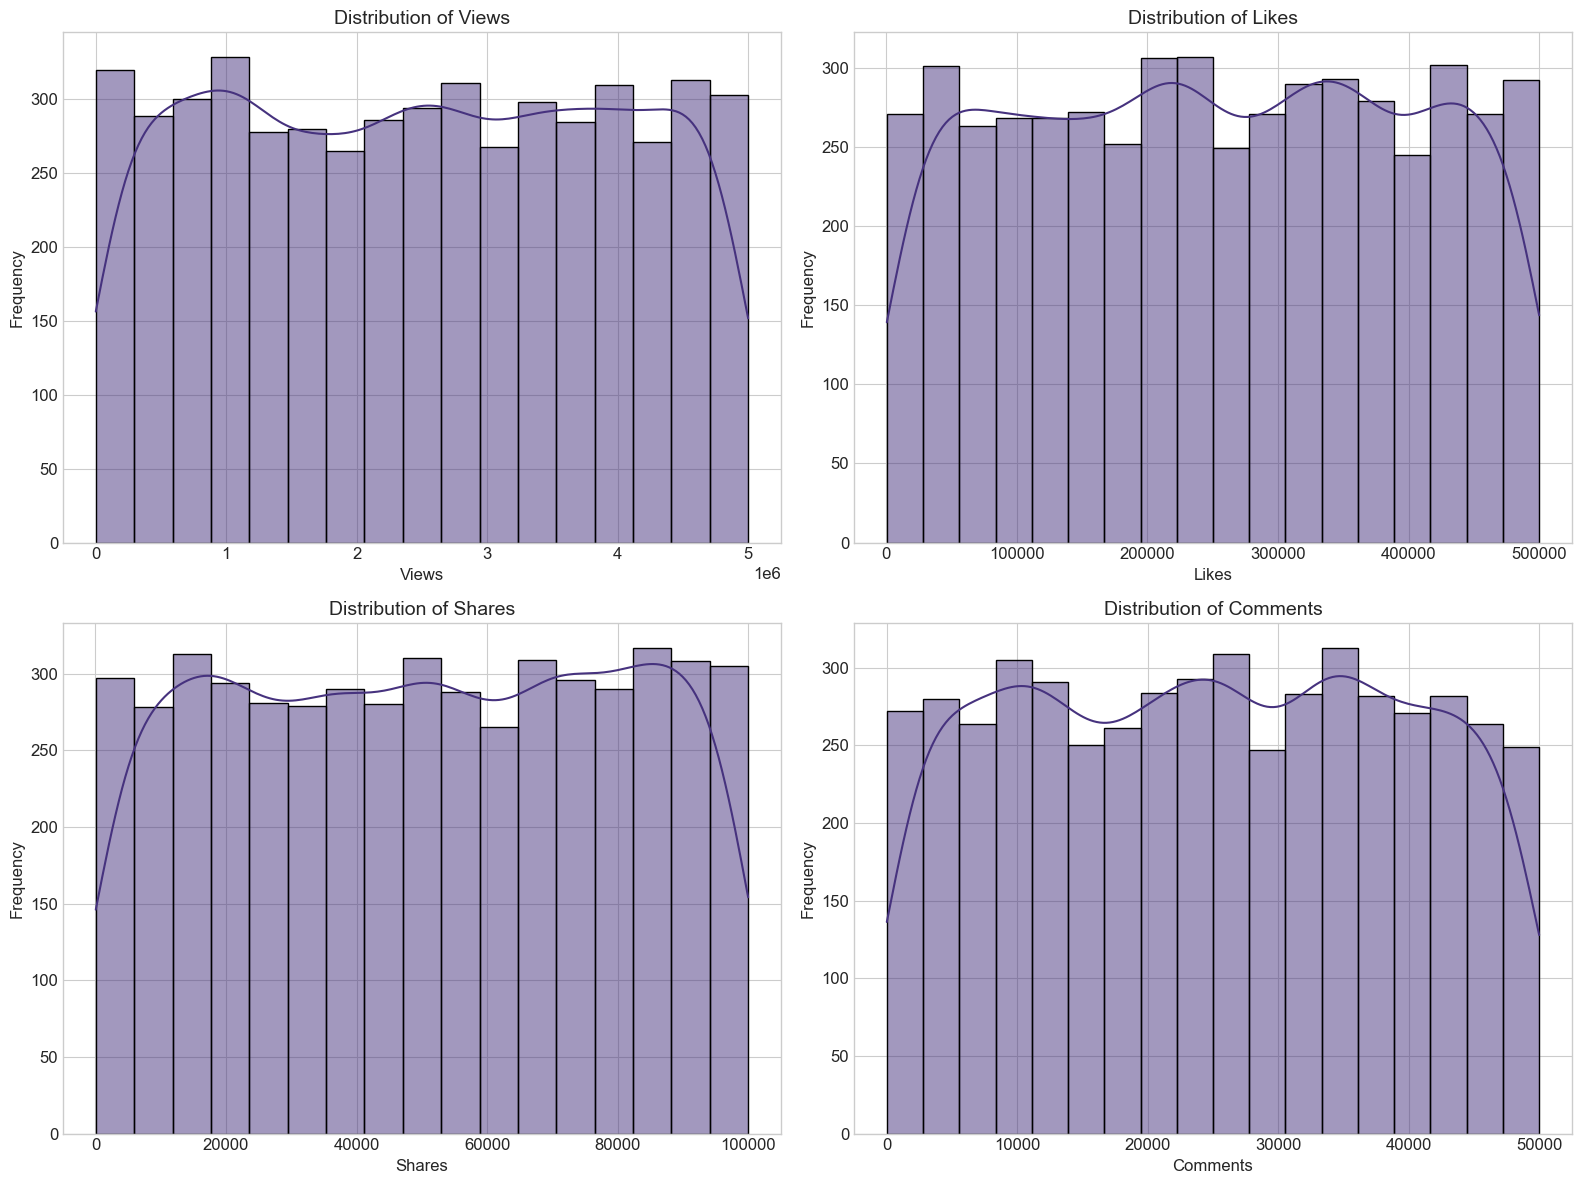

In [10]:
# Create histograms for numerical variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
# Check for skewness in the data
skewness = df[numerical_cols].apply(lambda x: stats.skew(x))
print(f"Skewness in numerical variables:\n{skewness}")

Skewness in numerical variables:
Views       0.000082
Likes      -0.012295
Shares     -0.020218
Comments   -0.002191
dtype: float64


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

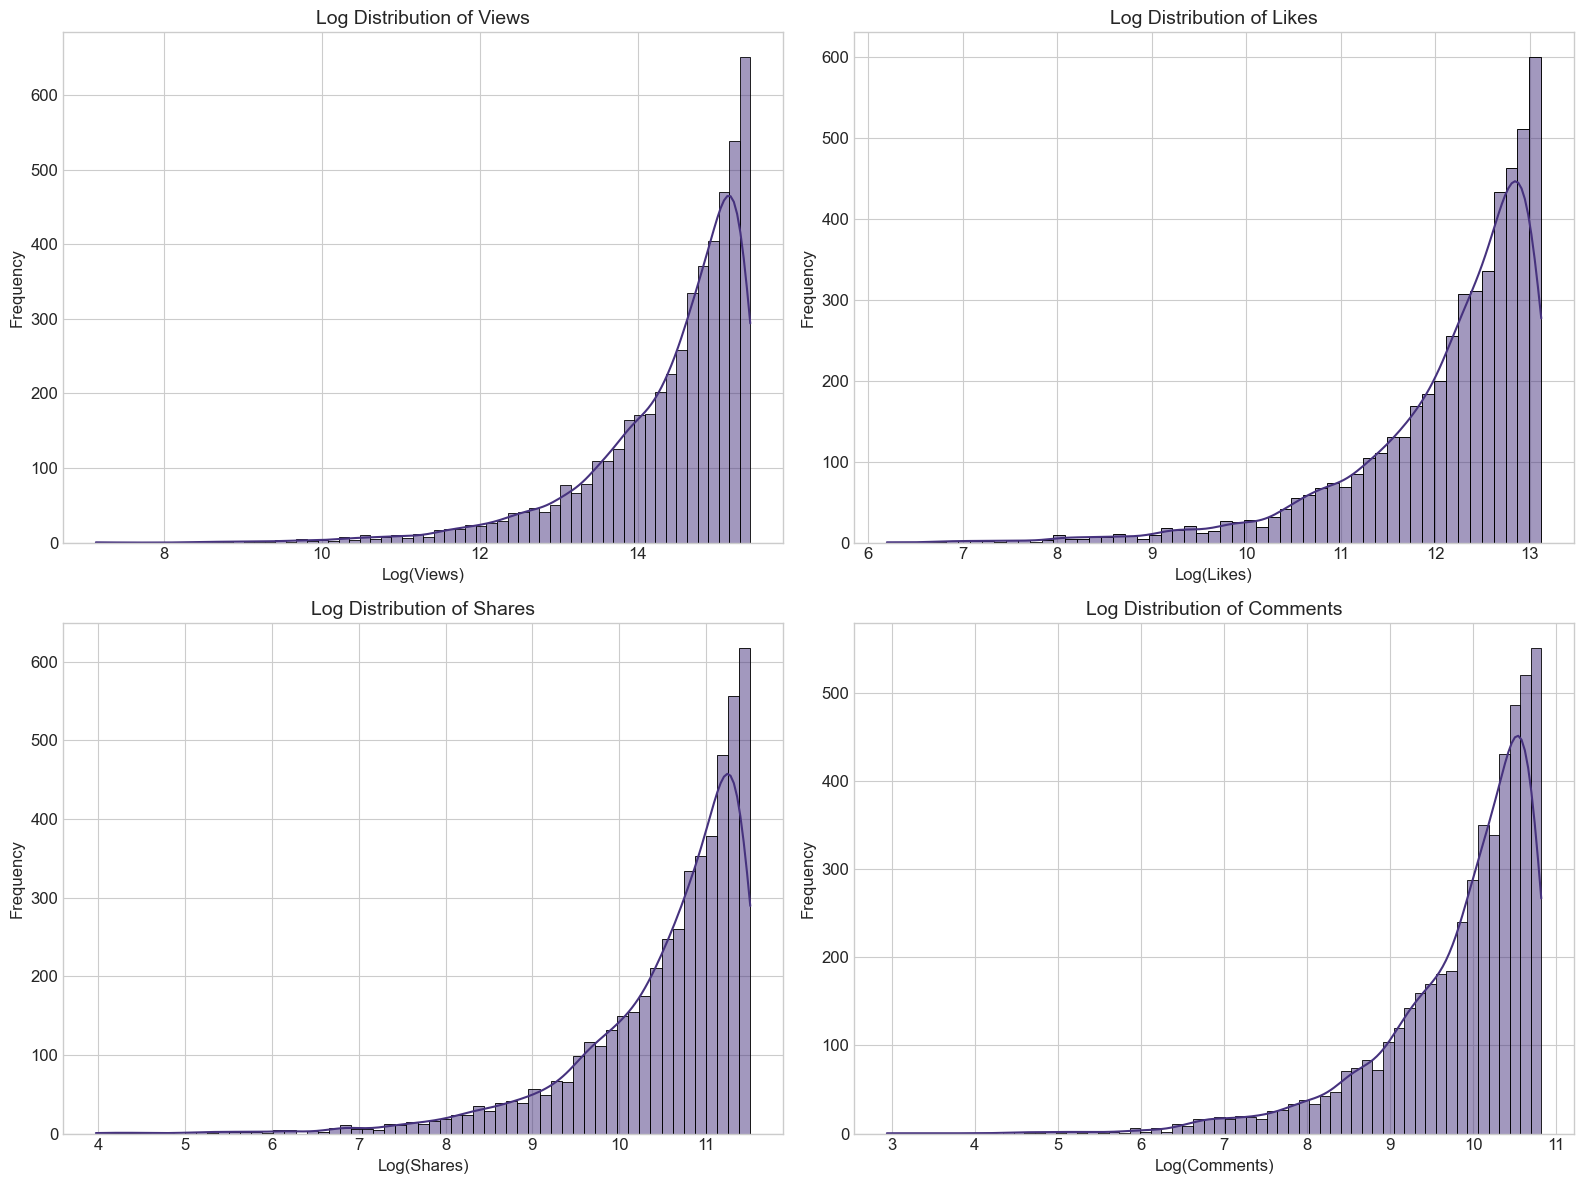

In [12]:
# Create log-transformed histograms for better visualization of skewed data
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    if df[col].min() > 0:  # Ensure we don't try to take log of zero or negative values
        sns.histplot(np.log1p(df[col]), kde=True)
        plt.title(f'Log Distribution of {col}', fontsize=14)
        plt.xlabel(f'Log({col})', fontsize=12)
    else:
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

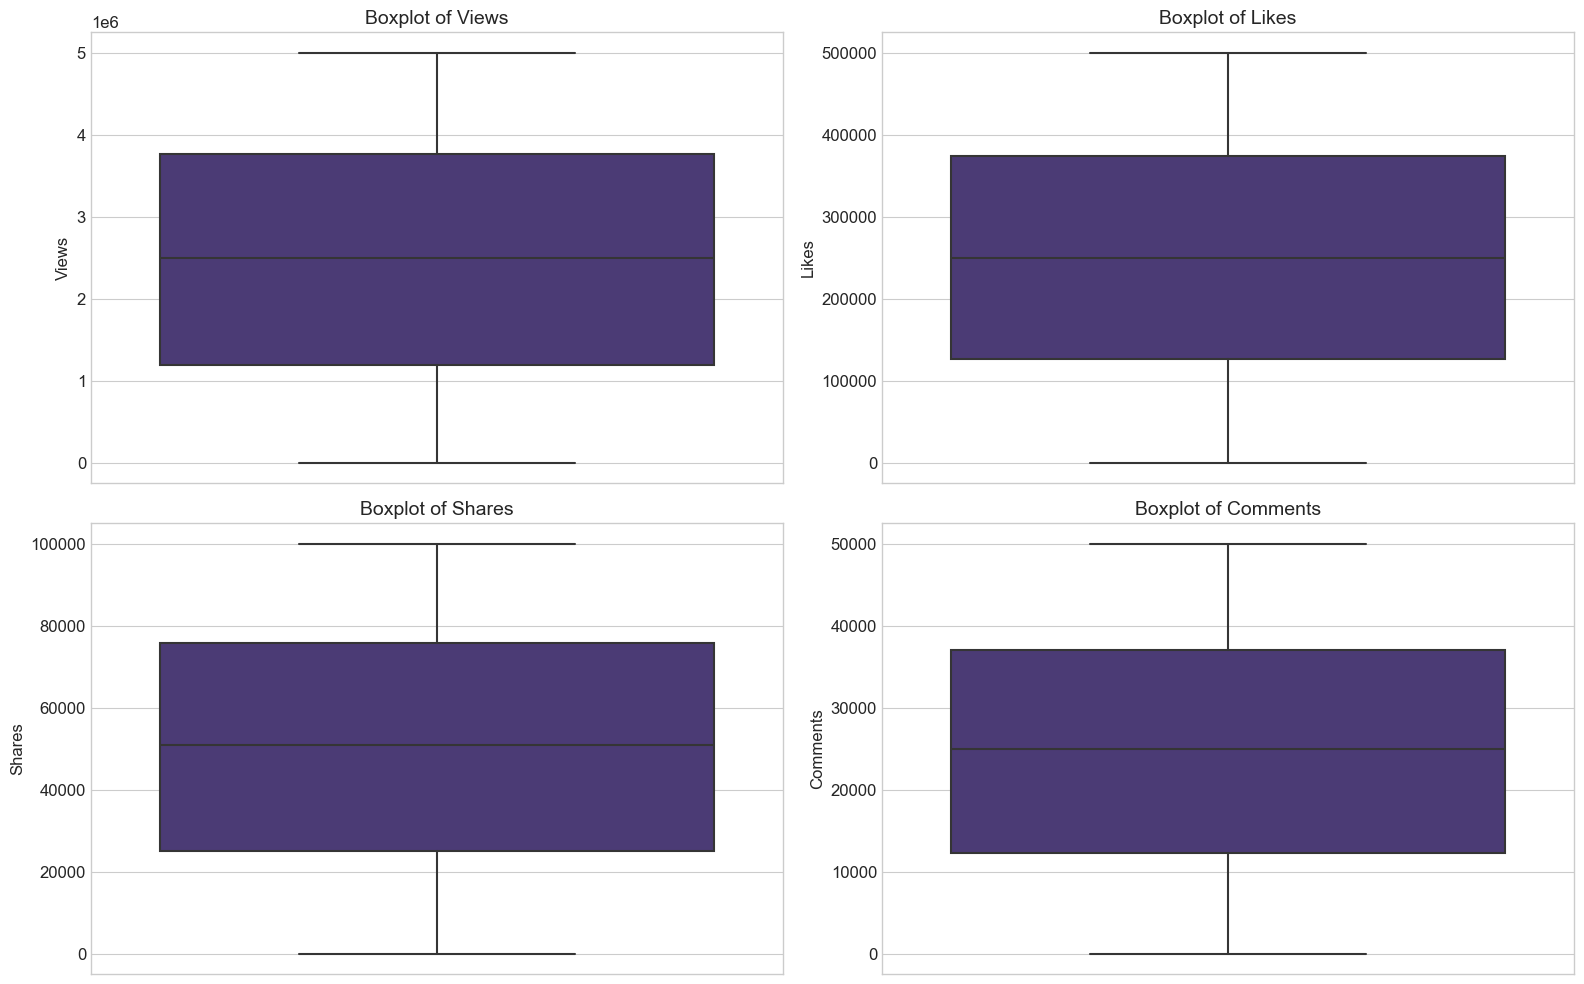

In [13]:
# Create boxplots to identify outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

Let's examine how the numerical variables are correlated with each other.

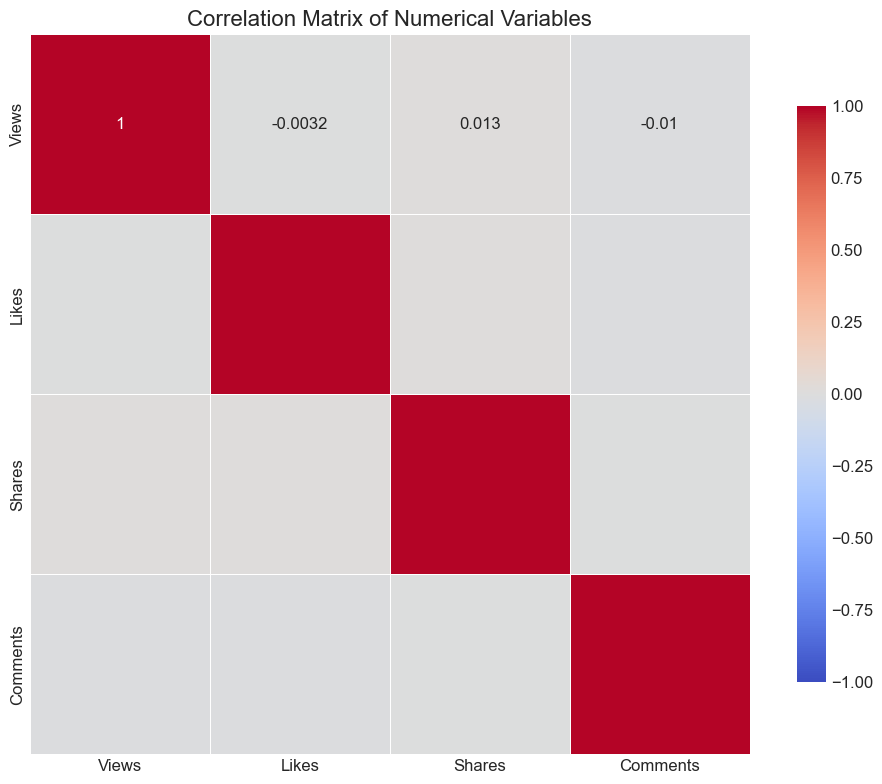

In [14]:
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

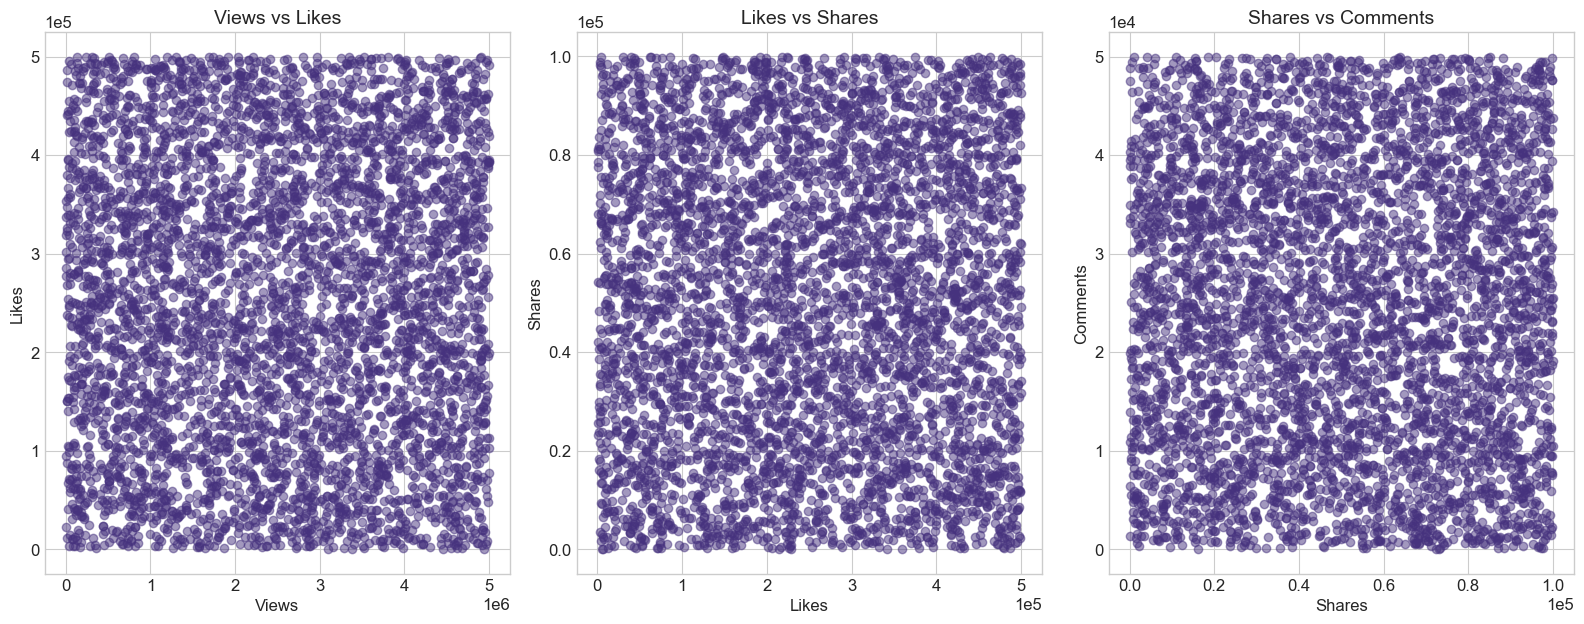

In [17]:
# Create scatterplots of correlated variables
plt.figure(figsize=(16, 12))
for i, x in enumerate(numerical_cols[:-1]):
    for j, y in enumerate(numerical_cols[i+1:], i+1):
        plt.subplot(2, 3, i+1)
        plt.scatter(df[x], df[y], alpha=0.5)
        plt.title(f'{x} vs {y}', fontsize=14)
        plt.xlabel(x, fontsize=12)
        plt.ylabel(y, fontsize=12)
        plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
        break  # Just show a few key plots
plt.tight_layout()
plt.show()

## 6. Platform-Specific Analysis

Let's analyze engagement metrics across different platforms.

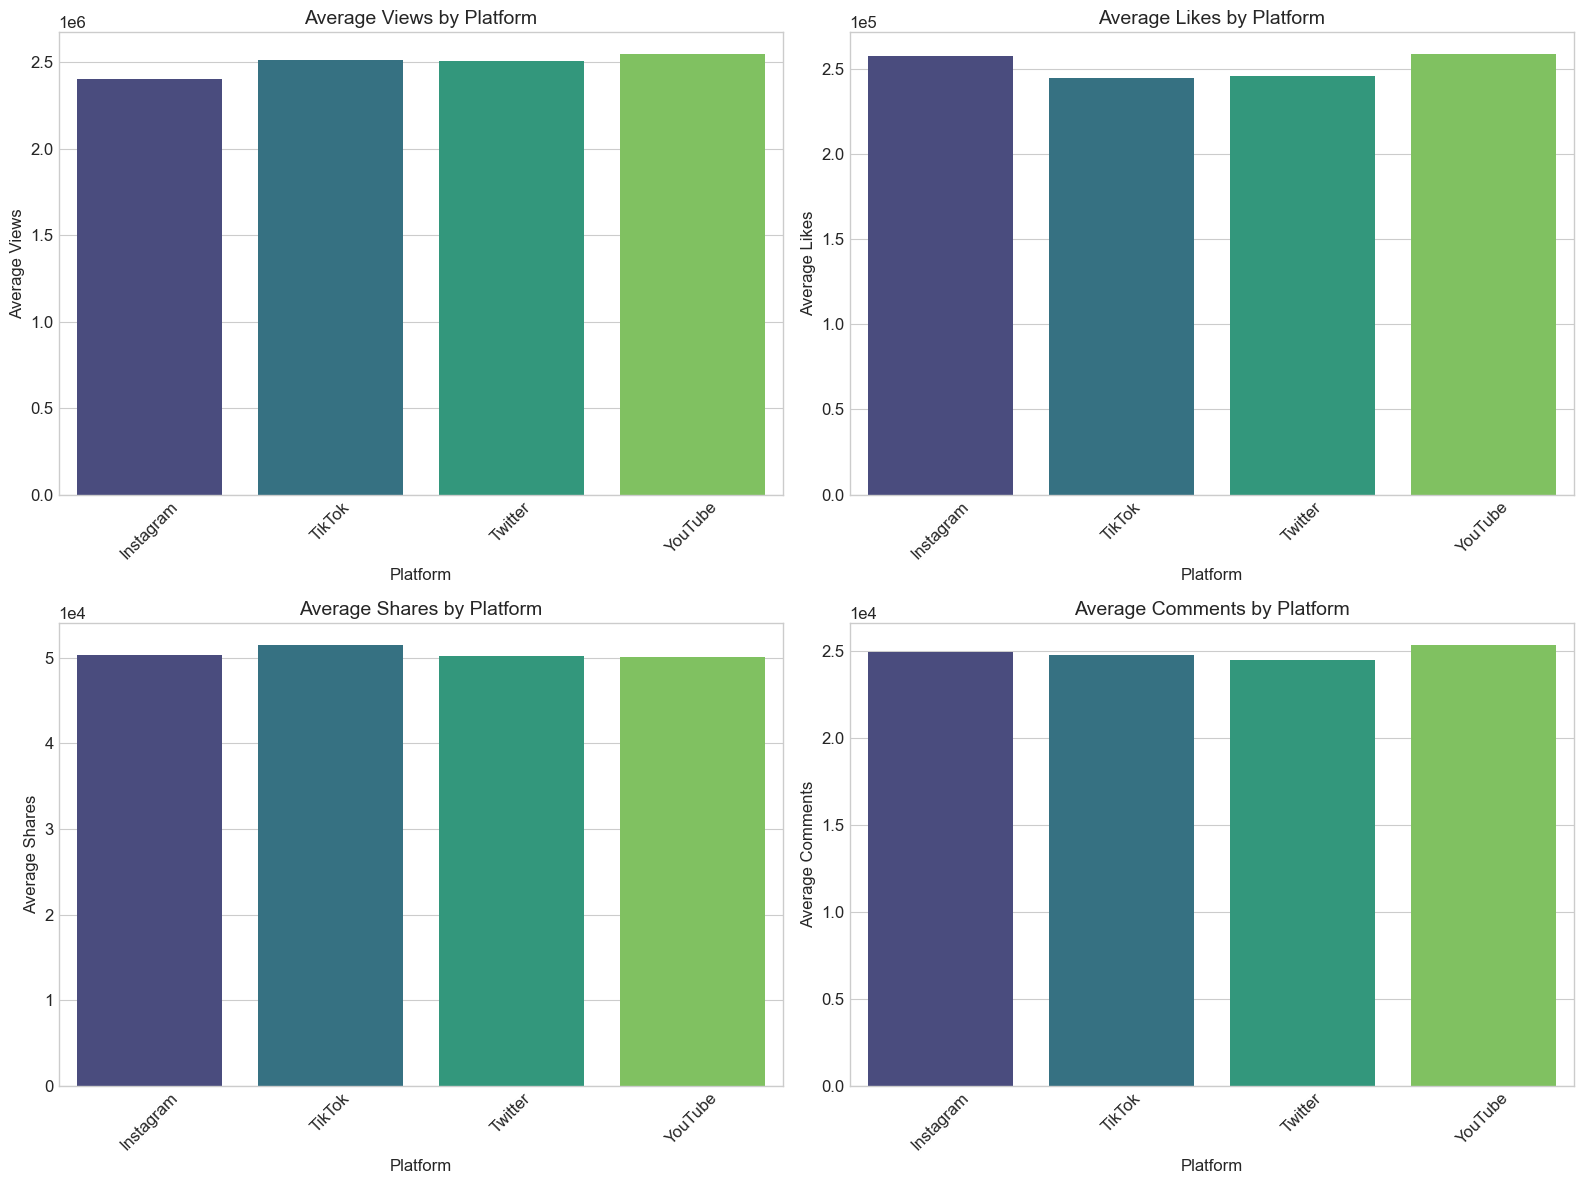

In [18]:
# Average engagement metrics by platform
platform_metrics = df.groupby('Platform')[numerical_cols].mean().reset_index()
platform_metrics

# Create bar plots for each metric by platform
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Platform', y=col, data=platform_metrics, palette="viridis")
    plt.title(f'Average {col} by Platform', fontsize=14)
    plt.xlabel('Platform', fontsize=12)
    plt.ylabel(f'Average {col}', fontsize=12)
    plt.xticks(rotation=45)
    # Format y-axis for large numbers
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3428\2135459408.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(data[group_var].unique()))


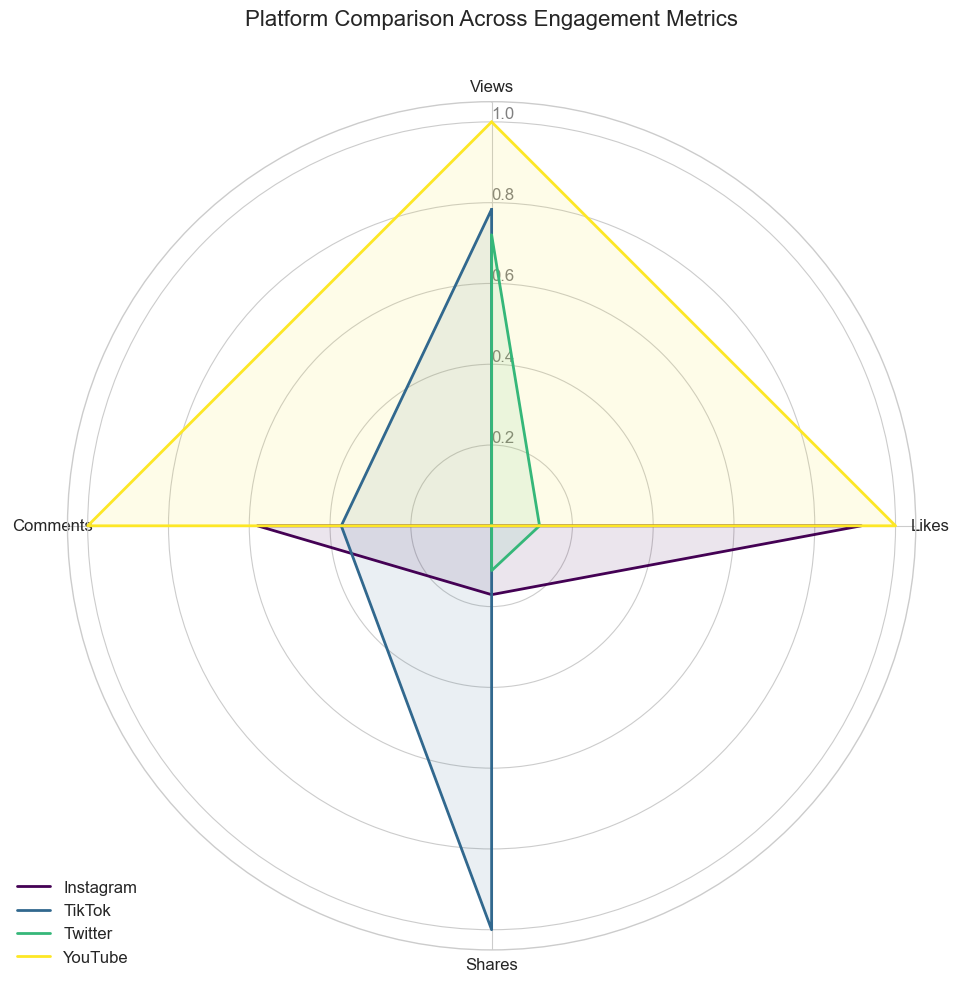

In [19]:
# Create a radar chart to compare platforms across all metrics
def radar_chart(data, categories, group_var, value_vars, title):
    # Number of variables
    N = len(value_vars)
    
    # We need to repeat the first value to close the circular graph
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Set the first axis to be on top
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], value_vars, fontsize=12)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey")
    
    # Set colors for different groups
    cmap = plt.cm.get_cmap("viridis", len(data[group_var].unique()))
    
    # Plot each group
    for i, group in enumerate(data[group_var].unique()):
        group_data = data[data[group_var] == group]
        
        # Scale the values to fit on the same chart
        scaled_values = []
        for val_var in value_vars:
            # Scale between 0 and 1 using min-max scaling
            min_val = data[val_var].min()
            max_val = data[val_var].max()
            if max_val == min_val:
                scaled_values.append(0.5)  # If all values are the same
            else:
                scaled_value = (group_data[val_var].values[0] - min_val) / (max_val - min_val)
                scaled_values.append(scaled_value)
        
        # Add the first value again to close the circular graph
        values = scaled_values + [scaled_values[0]]
        
        # Plot the values
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=group, color=cmap(i))
        ax.fill(angles, values, alpha=0.1, color=cmap(i))
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=16, y=1.08)
    
    plt.tight_layout()
    plt.show()

# Create the radar chart
radar_chart(platform_metrics, 'Platform', 'Platform', numerical_cols, 'Platform Comparison Across Engagement Metrics')

## 7. Content Type Analysis

Let's analyze how different content types perform across platforms.

In [20]:
# Average engagement metrics by content type
content_metrics = df.groupby('Content_Type')[numerical_cols].mean().reset_index()
content_metrics = content_metrics.sort_values(by='Views', ascending=False)
content_metrics.head(10)

,Content_Type,Views,Likes,Shares,Comments
2,Reel,2.533269e+06,255011.068966,51357.868014,25223.405470
4,Tweet,2.500387e+06,249384.470096,51427.454545,24635.985646
5,Video,2.489009e+06,254768.923913,50614.386473,24694.614734
3,Shorts,2.486351e+06,247926.202033,49593.954257,25060.411690
0,Live Stream,2.481009e+06,248811.616374,49921.960234,25167.635088
1,Post,2.474337e+06,252784.174678,50164.198124,24554.968347


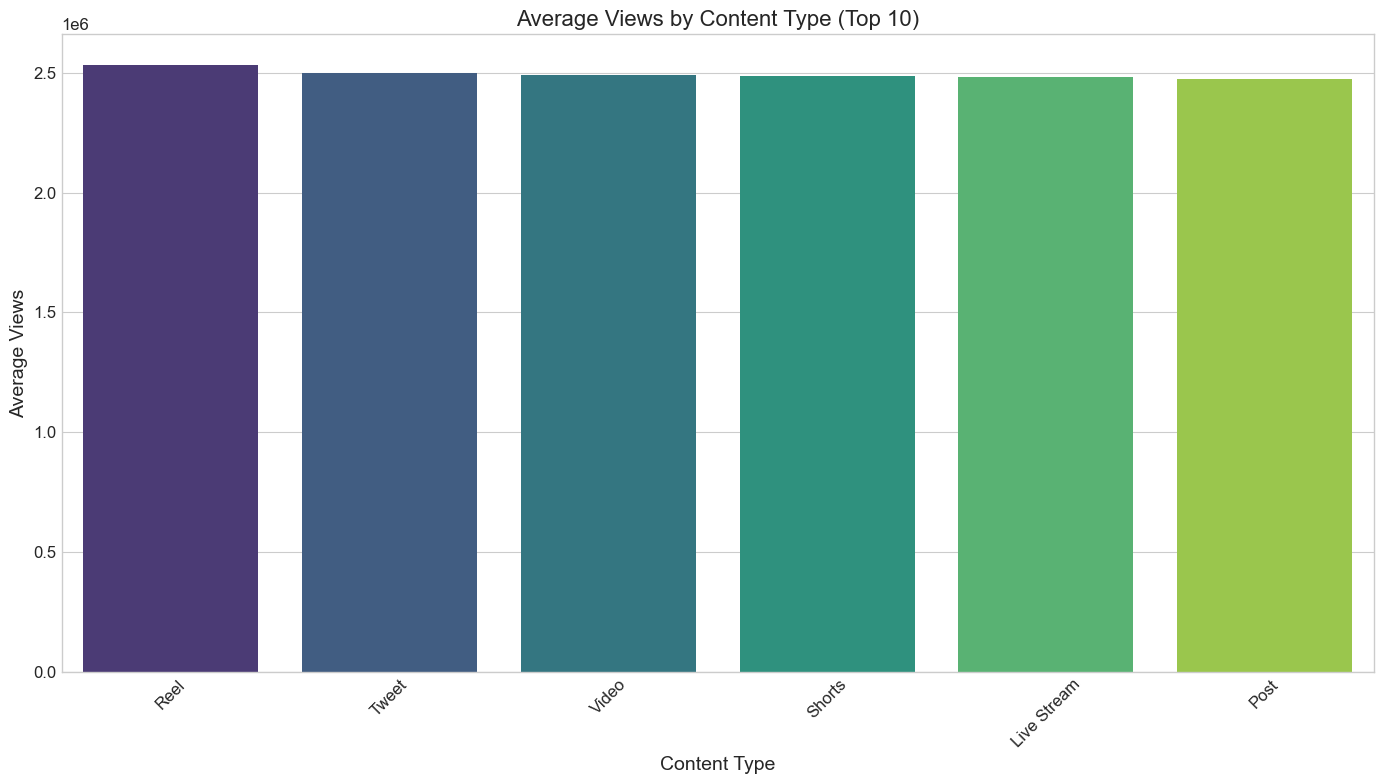

In [21]:
# Create bar plots for views by content type (top 10)
plt.figure(figsize=(14, 8))
top_content = content_metrics.head(10)
sns.barplot(x='Content_Type', y='Views', data=top_content, palette="viridis")
plt.title('Average Views by Content Type (Top 10)', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Average Views', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

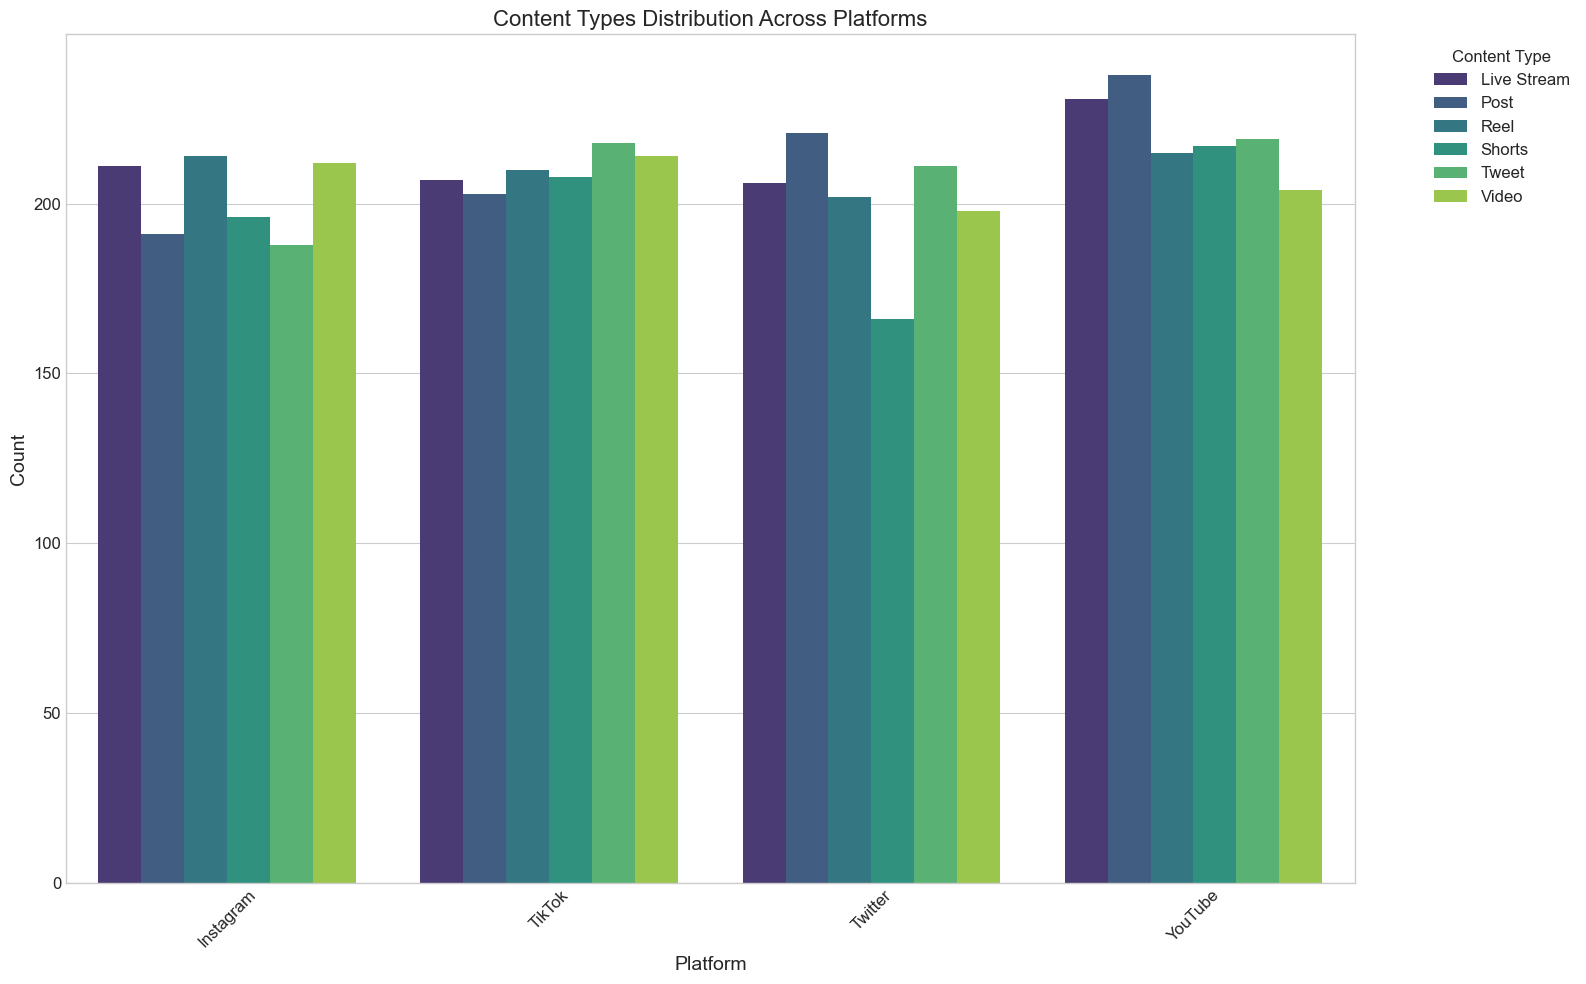

In [22]:
# Analyze content types by platform
platform_content = df.groupby(['Platform', 'Content_Type']).size().reset_index(name='Count')
plt.figure(figsize=(16, 10))
sns.barplot(x='Platform', y='Count', hue='Content_Type', data=platform_content, palette="viridis")
plt.title('Content Types Distribution Across Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 8. Engagement Level Analysis

Let's examine what factors contribute to different engagement levels.

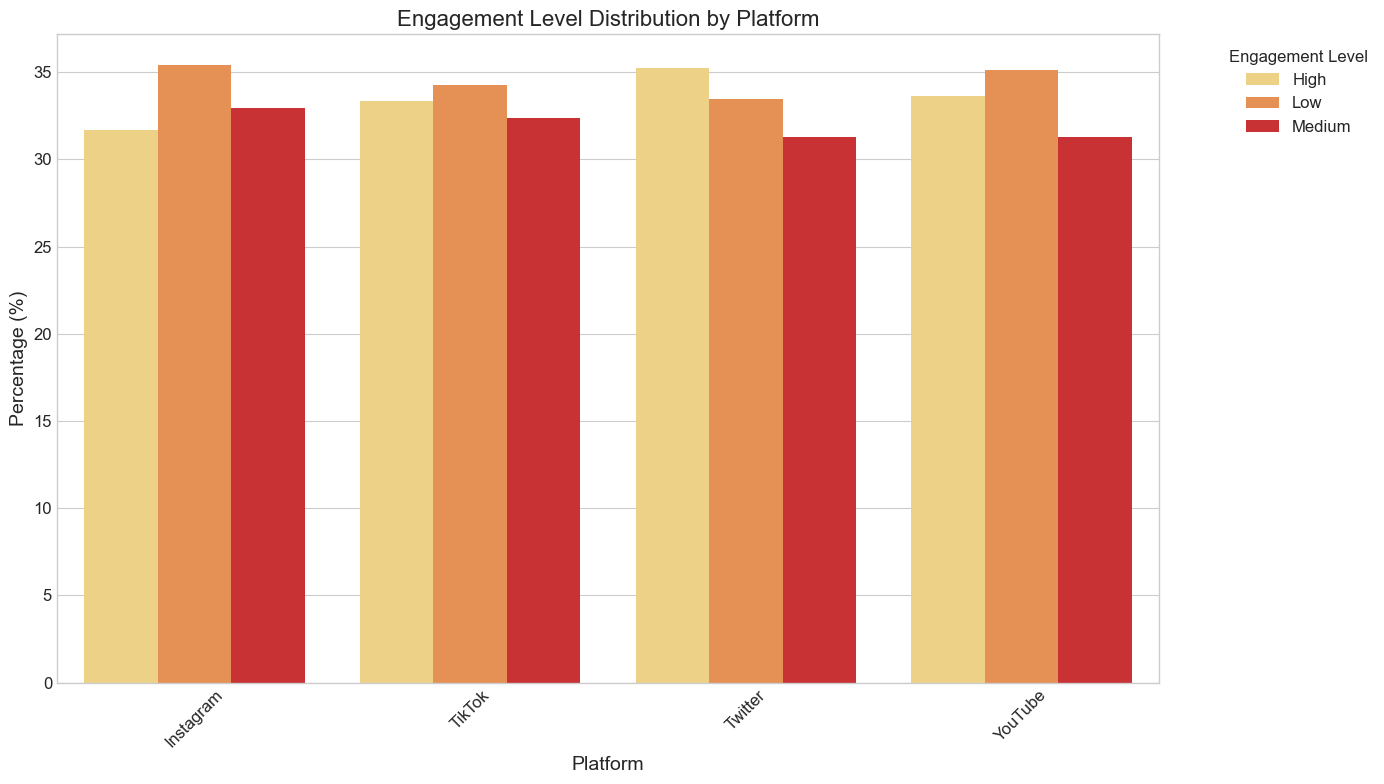

In [23]:
# Analyze engagement levels across platforms
engagement_platform = df.groupby(['Platform', 'Engagement_Level']).size().reset_index(name='Count')
engagement_platform['Percentage'] = engagement_platform.groupby('Platform')['Count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(14, 8))
sns.barplot(x='Platform', y='Percentage', hue='Engagement_Level', data=engagement_platform, palette="YlOrRd")
plt.title('Engagement Level Distribution by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Engagement Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

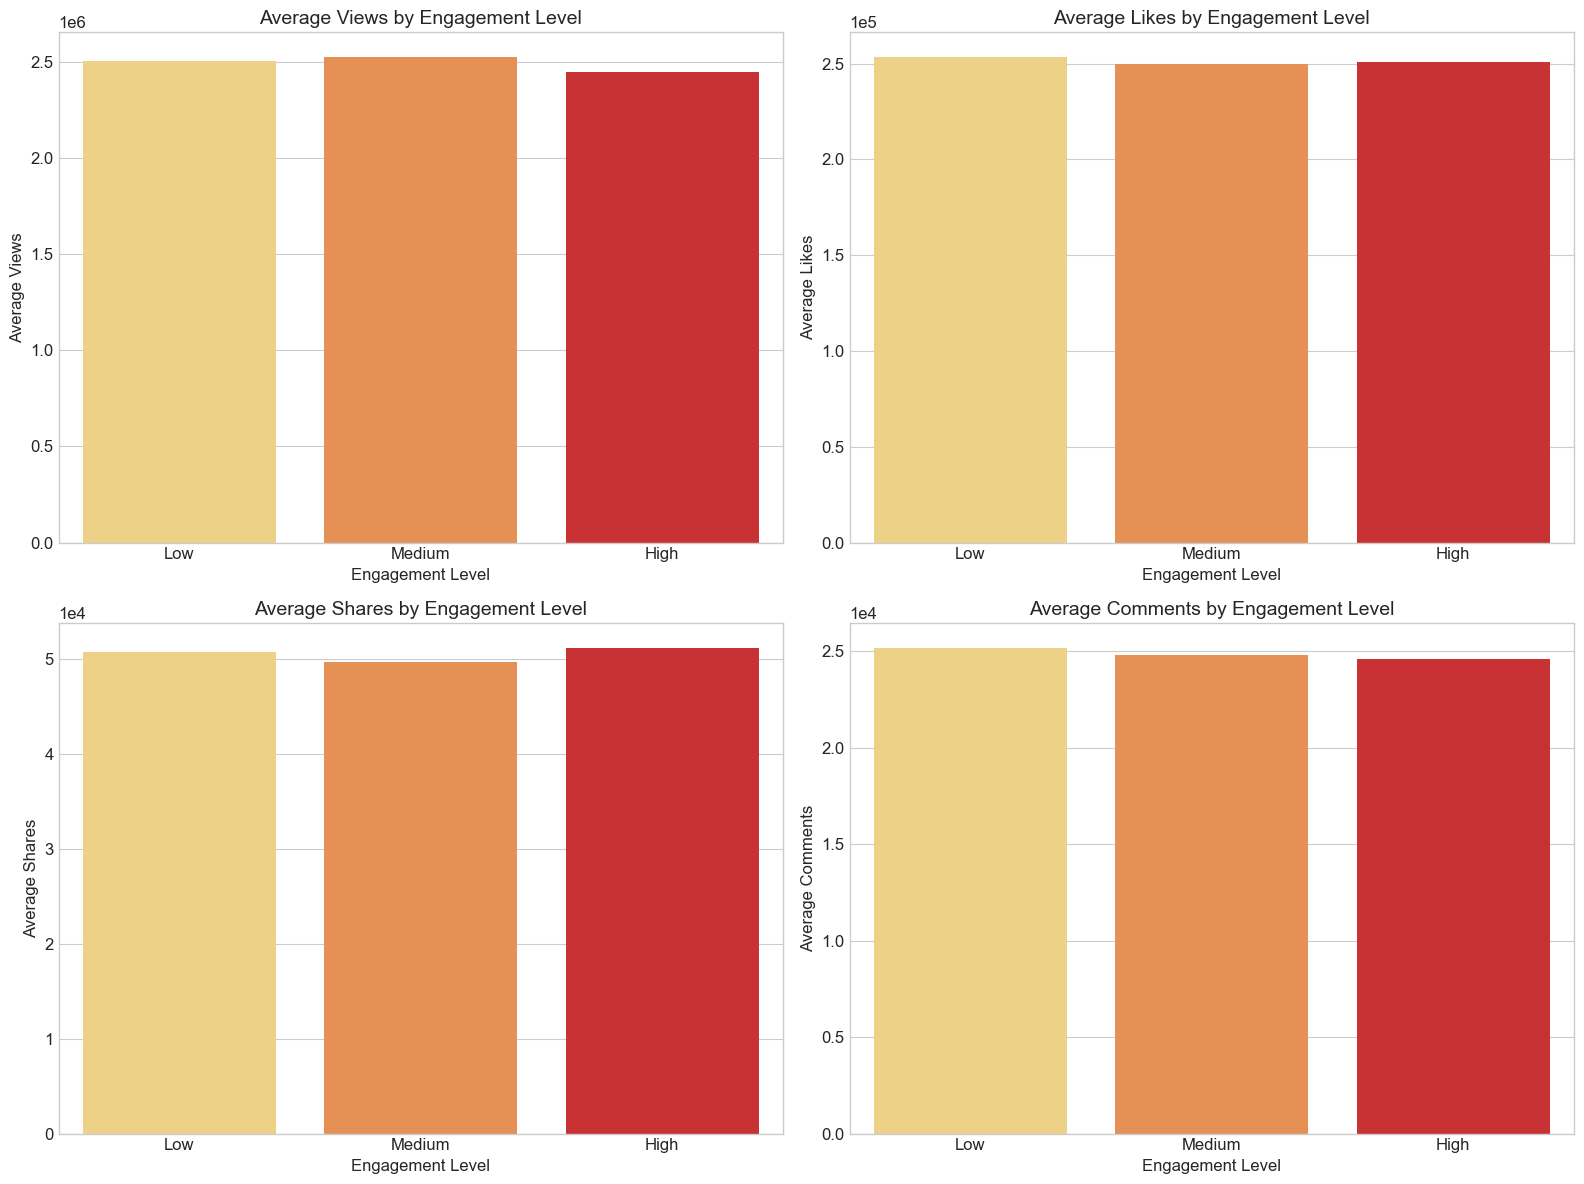

In [24]:
# Analyze metrics by engagement level
engagement_metrics = df.groupby('Engagement_Level')[numerical_cols].mean().reset_index()
engagement_metrics

# Create bar plots for each metric by engagement level
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    order = ['Low', 'Medium', 'High']
    sns.barplot(x='Engagement_Level', y=col, data=engagement_metrics, order=order, palette="YlOrRd")
    plt.title(f'Average {col} by Engagement Level', fontsize=14)
    plt.xlabel('Engagement Level', fontsize=12)
    plt.ylabel(f'Average {col}', fontsize=12)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

## 9. Regional Analysis

Let's explore how engagement varies across different regions.

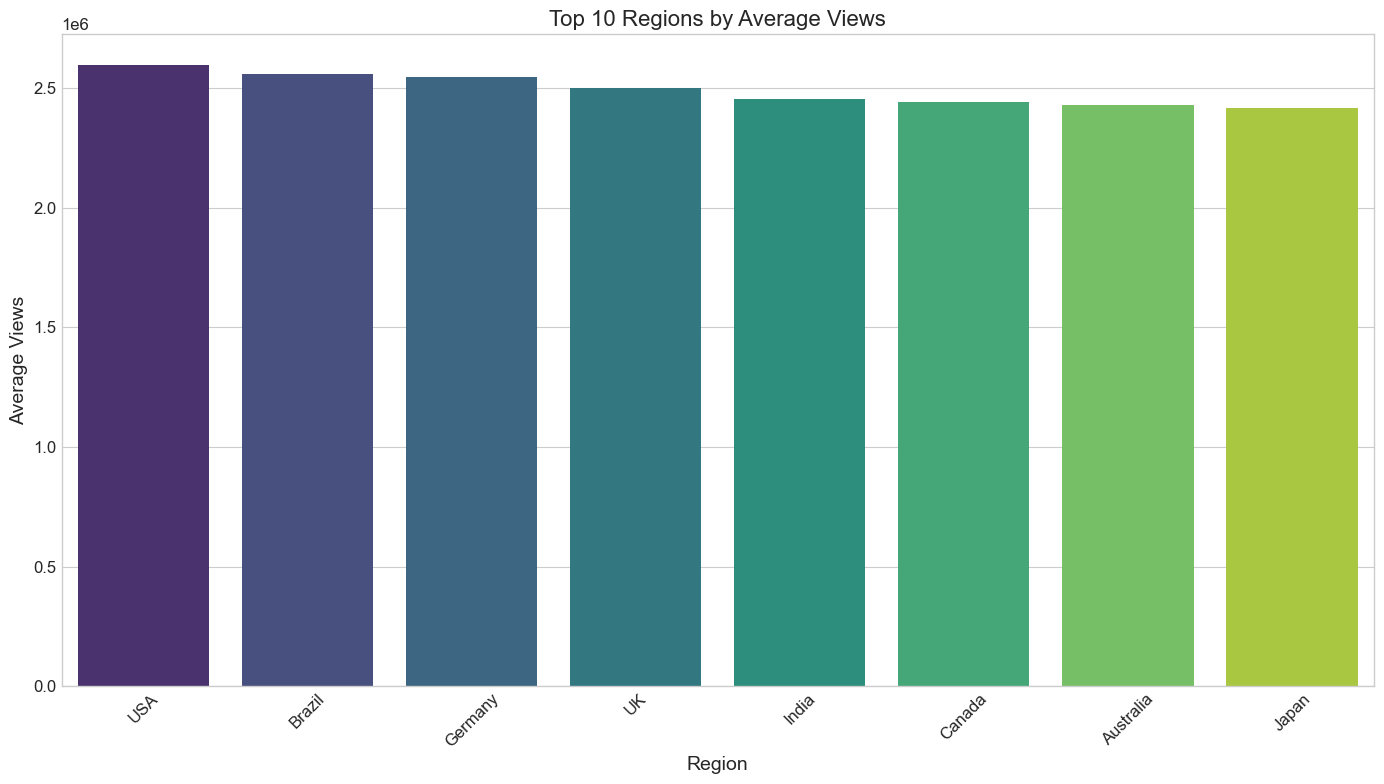

In [25]:
# Top 10 regions by average views
region_views = df.groupby('Region')['Views'].mean().reset_index()
region_views = region_views.sort_values('Views', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Views', data=region_views, palette="viridis")
plt.title('Top 10 Regions by Average Views', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Views', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

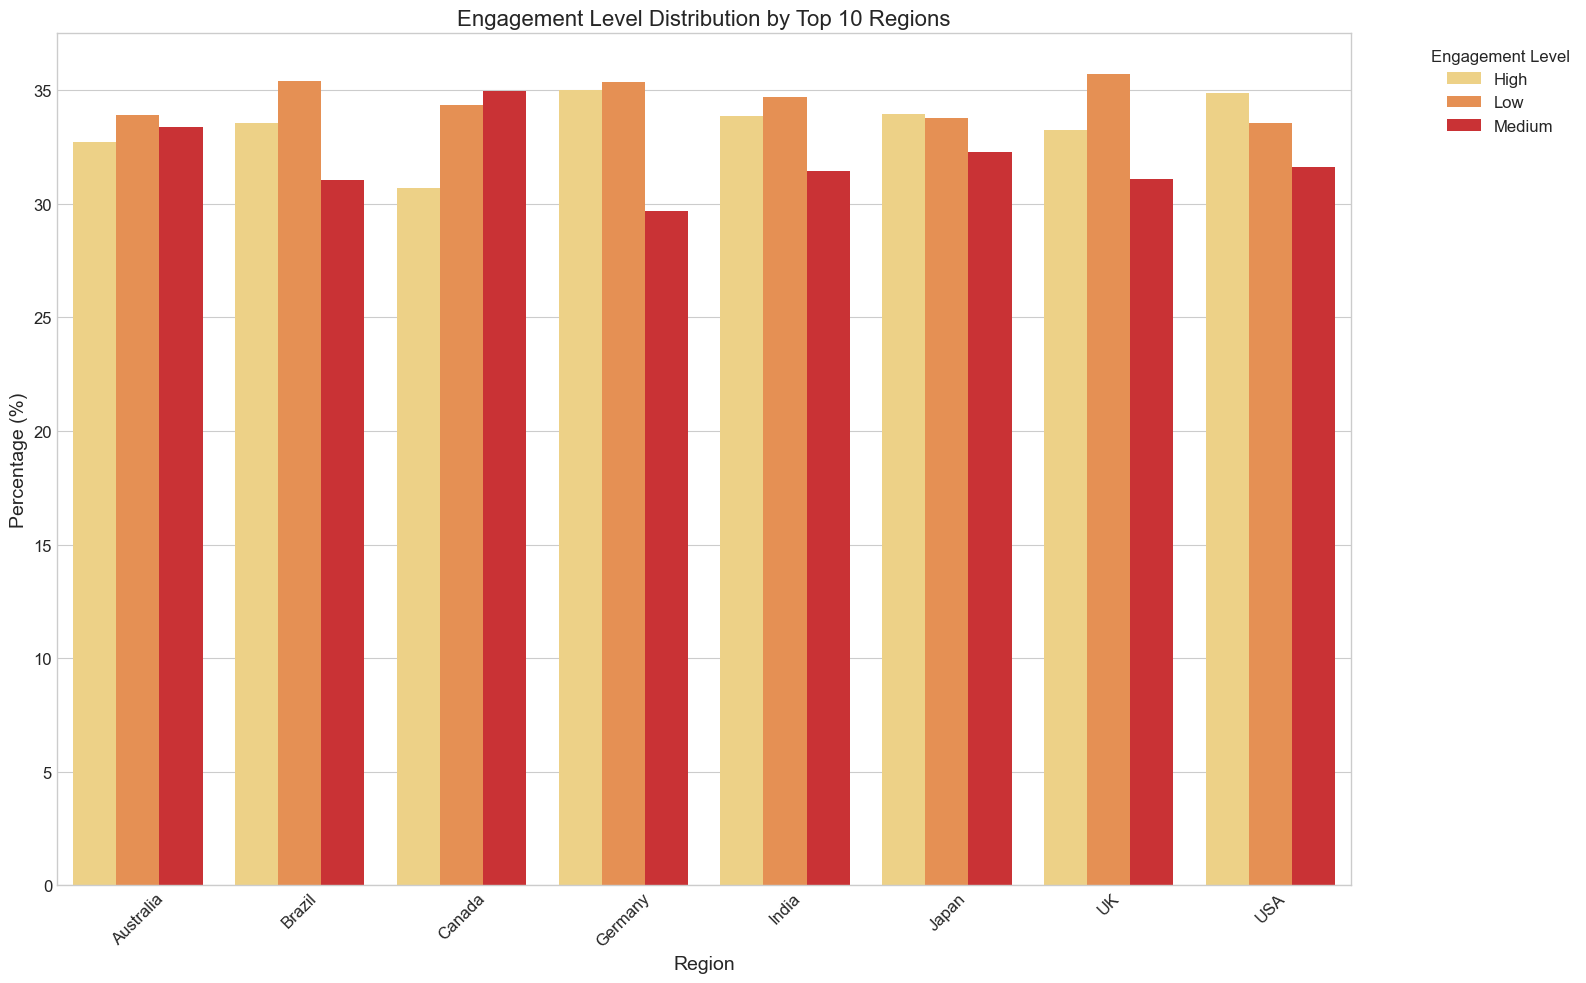

In [26]:
# Engagement level distribution across top regions
top_regions = df['Region'].value_counts().head(10).index
region_engagement = df[df['Region'].isin(top_regions)].groupby(['Region', 'Engagement_Level']).size().reset_index(name='Count')
region_engagement['Percentage'] = region_engagement.groupby('Region')['Count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(16, 10))
sns.barplot(x='Region', y='Percentage', hue='Engagement_Level', data=region_engagement, palette="YlOrRd")
plt.title('Engagement Level Distribution by Top 10 Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Engagement Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 10. Hashtag Analysis

Let's analyze the performance of trending hashtags.

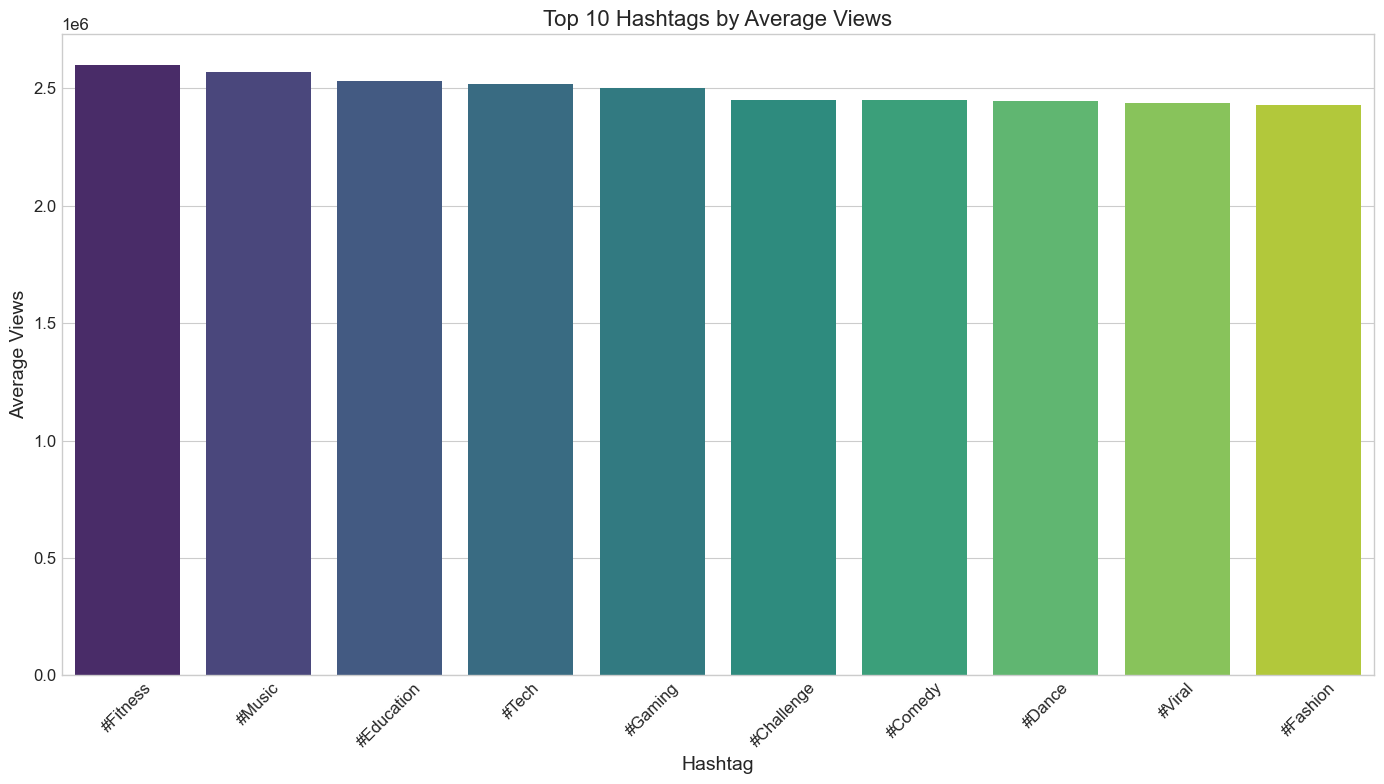

In [27]:
# Top 10 hashtags by average views
hashtag_views = df.groupby('Hashtag')['Views'].mean().reset_index()
hashtag_views = hashtag_views.sort_values('Views', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='Hashtag', y='Views', data=hashtag_views, palette="viridis")
plt.title('Top 10 Hashtags by Average Views', fontsize=16)
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Average Views', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

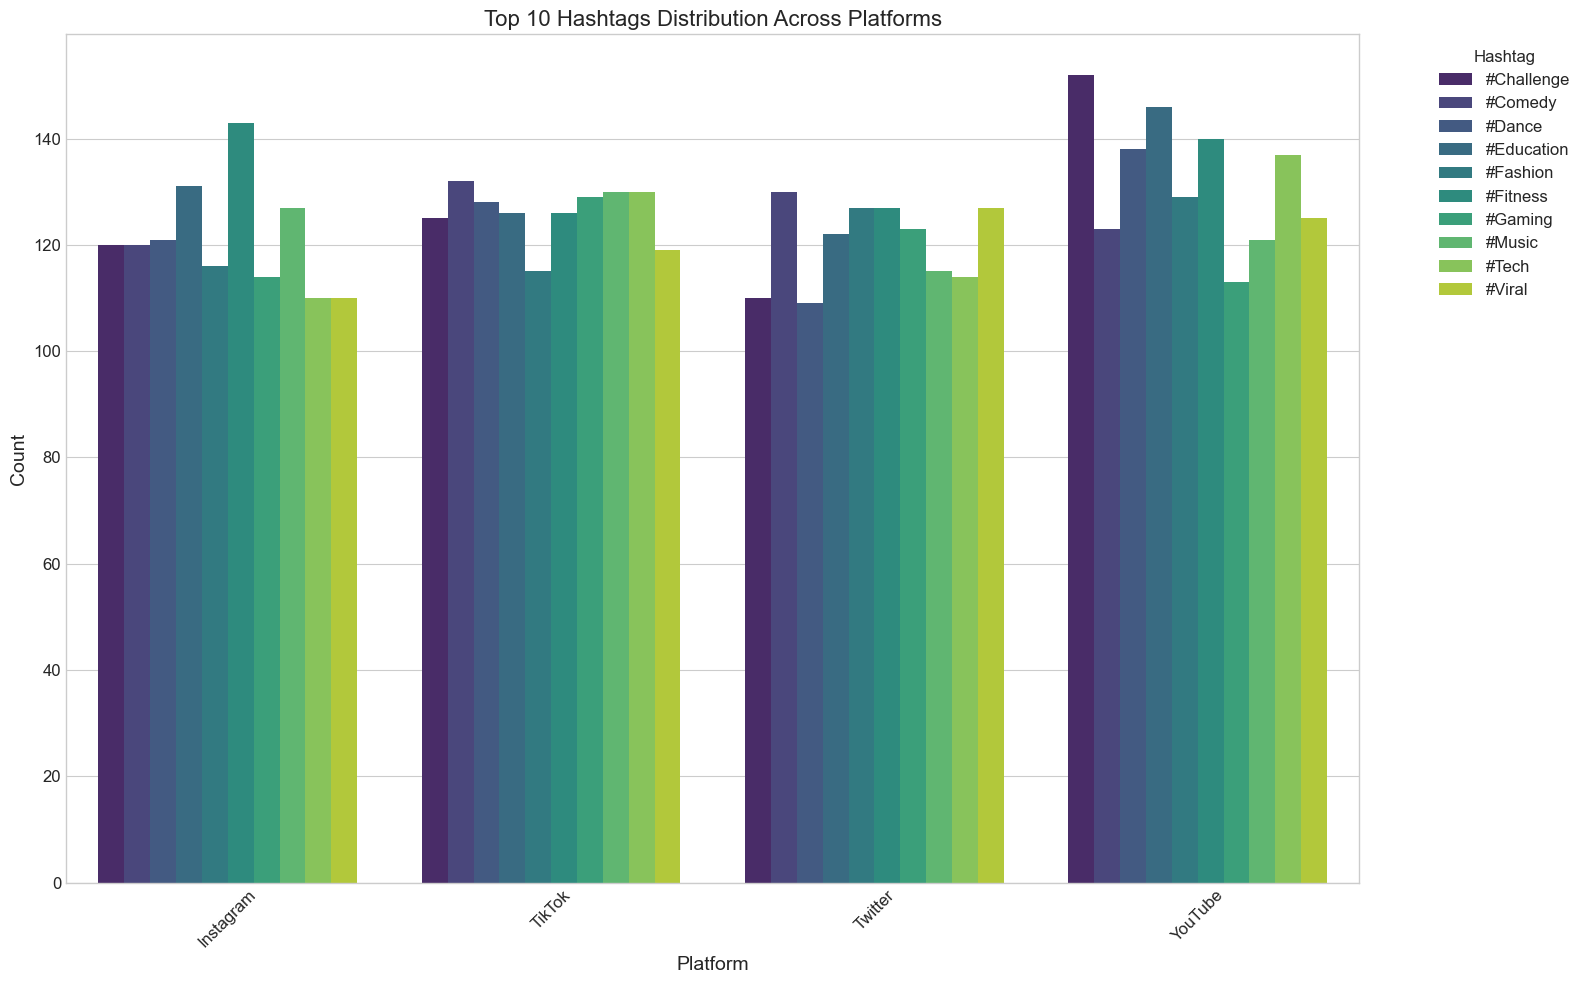

In [28]:
# Analyze hashtag distribution across platforms
top_hashtags = df['Hashtag'].value_counts().head(10).index
platform_hashtags = df[df['Hashtag'].isin(top_hashtags)].groupby(['Platform', 'Hashtag']).size().reset_index(name='Count')

plt.figure(figsize=(16, 10))
sns.barplot(x='Platform', y='Count', hue='Hashtag', data=platform_hashtags, palette="viridis")
plt.title('Top 10 Hashtags Distribution Across Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Hashtag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 11. Engagement Ratio Analysis

Let's create and analyze engagement ratios to understand audience interaction patterns.

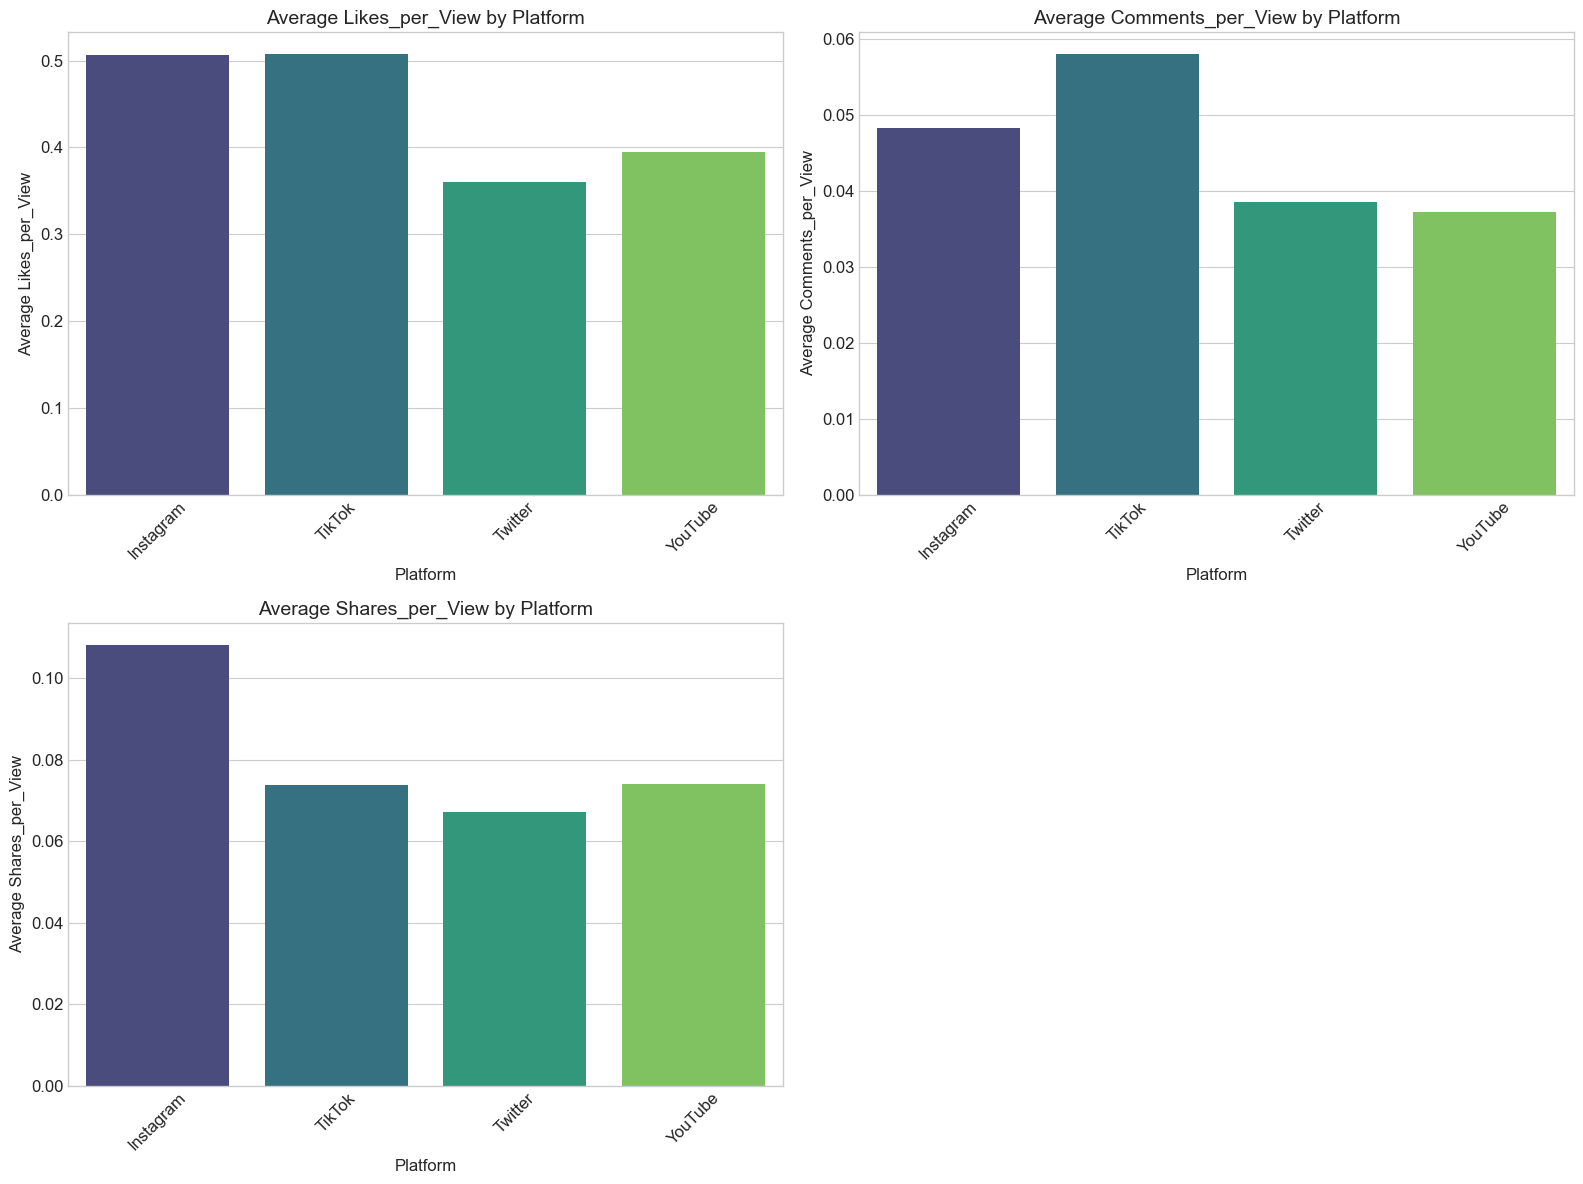

In [29]:
# Create engagement ratios
df['Likes_per_View'] = df['Likes'] / df['Views']
df['Comments_per_View'] = df['Comments'] / df['Views']
df['Shares_per_View'] = df['Shares'] / df['Views']

# Replace infinite values with NaN and then with 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Analyze engagement ratios by platform
ratio_cols = ['Likes_per_View', 'Comments_per_View', 'Shares_per_View']
platform_ratios = df.groupby('Platform')[ratio_cols].mean().reset_index()
platform_ratios

plt.figure(figsize=(16, 12))
for i, col in enumerate(ratio_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Platform', y=col, data=platform_ratios, palette="viridis")
    plt.title(f'Average {col} by Platform', fontsize=14)
    plt.xlabel('Platform', fontsize=12)
    plt.ylabel(f'Average {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3428\2135459408.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(data[group_var].unique()))


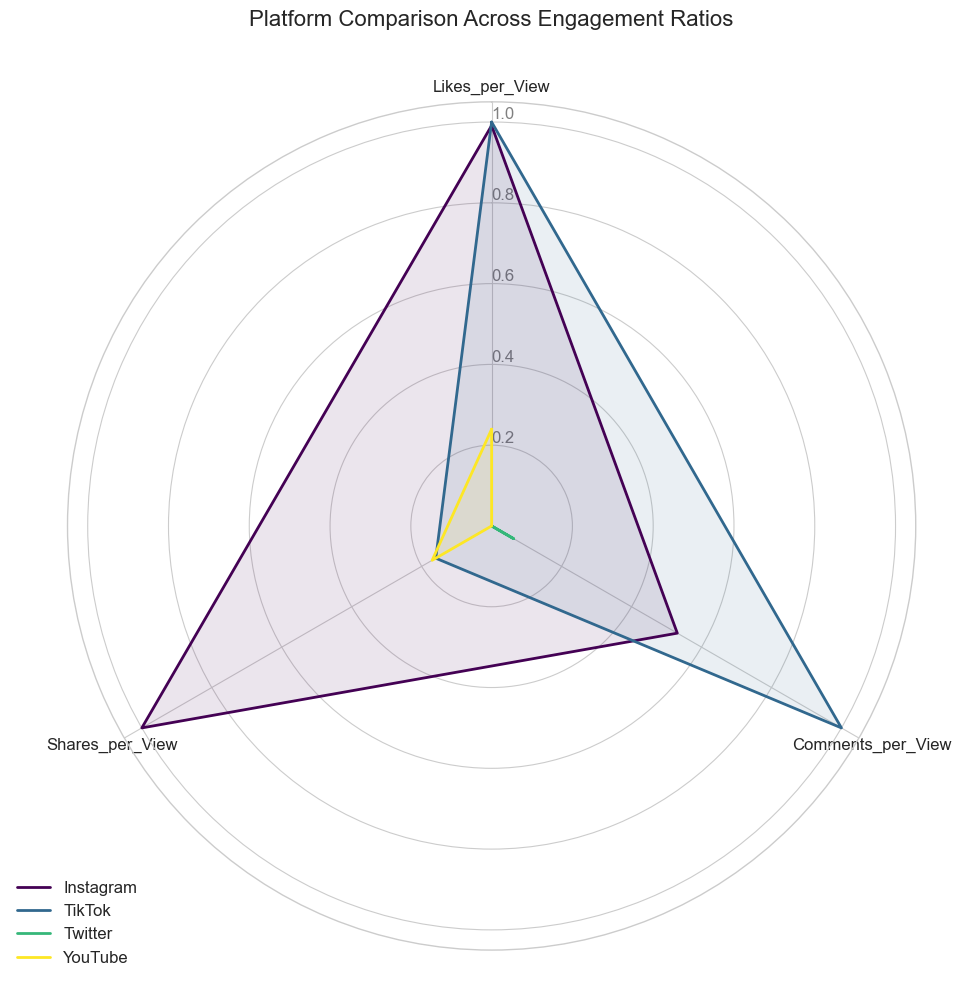

In [30]:
# Create radar chart for engagement ratios
radar_chart(platform_ratios, 'Platform', 'Platform', ratio_cols, 
            'Platform Comparison Across Engagement Ratios')

## 12. Summary of Key Findings

Let's summarize the key insights from our exploratory data analysis.

In [31]:
# Number of posts by platform
platform_counts = df['Platform'].value_counts()

# Average engagement metrics by platform
platform_avg = df.groupby('Platform')[numerical_cols].mean()

# Top content types by average views
content_avg_views = df.groupby('Content_Type')['Views'].mean().sort_values(ascending=False).head(5)

# Top hashtags by average views
hashtag_avg_views = df.groupby('Hashtag')['Views'].mean().sort_values(ascending=False).head(5)

# Top regions by average views
region_avg_views = df.groupby('Region')['Views'].mean().sort_values(ascending=False).head(5)

# Correlation between metrics
correlation = df[numerical_cols].corr()

In [32]:
# Print summary
print("=== VIRAL SOCIAL MEDIA TRENDS - KEY INSIGHTS ===\n")

print("1. PLATFORM DISTRIBUTION:")
print(platform_counts)
print("\n2. AVERAGE ENGAGEMENT METRICS BY PLATFORM:")
print(platform_avg)
print("\n3. TOP 5 CONTENT TYPES BY AVERAGE VIEWS:")
print(content_avg_views)
print("\n4. TOP 5 HASHTAGS BY AVERAGE VIEWS:")
print(hashtag_avg_views)
print("\n5. TOP 5 REGIONS BY AVERAGE VIEWS:")
print(region_avg_views)
print("\n6. CORRELATION BETWEEN ENGAGEMENT METRICS:")
print(correlation)

=== VIRAL SOCIAL MEDIA TRENDS - KEY INSIGHTS ===

1. PLATFORM DISTRIBUTION:
Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64

2. AVERAGE ENGAGEMENT METRICS BY PLATFORM:
                  Views          Likes        Shares      Comments
Platform                                                          
Instagram  2.404080e+06  257118.217822  50310.909241  24958.113861
TikTok     2.515015e+06  244206.719841  51468.256349  24778.696825
Twitter    2.506005e+06  245880.118771  50227.750831  24456.857143
YouTube    2.545648e+06  258314.002266  50073.091390  25321.390483

3. TOP 5 CONTENT TYPES BY AVERAGE VIEWS:
Content_Type
Reel           2.533269e+06
Tweet          2.500387e+06
Video          2.489009e+06
Shorts         2.486351e+06
Live Stream    2.481009e+06
Name: Views, dtype: float64

4. TOP 5 HASHTAGS BY AVERAGE VIEWS:
Hashtag
#Fitness      2.599391e+06
#Music        2.568759e+06
#Education    2.531228e+06
#Tech         2.516381

## 13. Conclusion and Next Steps

Based on our exploratory data analysis, we've identified several interesting patterns and insights about viral social media trends. Here are some conclusions and potential next steps for further analysis:

CONCLUSION:
From our analysis of the Viral Social Media Trends dataset, we can draw several key insights:

1. Platform-specific patterns: Each platform shows distinct engagement patterns, with some platforms generating more views while others have higher interaction rates.

2. Content type influence: Certain content types consistently outperform others across platforms, suggesting universal appeal.

3. Regional variations: Content performance varies significantly by region, indicating the importance of geographical targeting.

4. Hashtag effectiveness: Some hashtags demonstrate much higher engagement, highlighting their value for content strategy.

5. Engagement correlations: Strong correlations exist between certain metrics (e.g., likes and comments), while others show weaker relationships.

NEXT STEPS:
1. Predictive modeling to forecast viral potential based on content characteristics
2. Time series analysis to identify temporal patterns in viral content
3. Natural language processing on hashtags to identify semantic patterns
4. Cluster analysis to identify distinct audience segments
5. A/B testing recommendations based on high-performing content attributes